In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import tree

In [2]:
comp = pd.read_csv("/Users/halders/Documents/Excelr/Assignments/Decision Tree/Company_Data.csv")
comp.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
comp.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
s_m= comp['Sales'].mean()

# for creating an order, we get the sales mean  and divide the data as good for sales above sales mean and bad as sales below sales mean

In [6]:
# creating an empty column called sales_mean, the assiging 0 and 1 based on sales less than mean condition
comp['Sales_Average']=''
comp.loc[comp['Sales'] >= s_m,'Sales_Average']="1" # sale more than sales mean
comp.loc[comp['Sales'] < s_m,'Sales_Average']="0" # sales less than sales mean
#dropping Sales from original df
comp.drop(['Sales'],axis=1,inplace= True )

In [7]:
#label encoding object columns

le = preprocessing.LabelEncoder()
for i in comp.columns:
    if comp[i].dtype == object:
        comp[i] = le.fit_transform(comp[i])
    else:
        pass

    

In [8]:
comp.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Average
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


In [9]:
comp['Sales_Average'].value_counts() #getting unique values of sales average data.

0    201
1    199
Name: Sales_Average, dtype: int64

## Inference: here we can see that the data is  balanced.

In [10]:
# Splitting the dataset into x and y 
x = comp.iloc[:,0:10]
y = pd.DataFrame(comp.iloc[:,10])

In [11]:
comp.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Sales_Average'],
      dtype='object')

In [12]:
# Splitting dataset into test and train
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 40)

### Fitting Gridsearch model first to find out optimal criteria and maximum depth.


In [13]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'criterion': ['gini','entropy'],'max_depth': range(2,10)}]
clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree,tuned_parameters,cv=10,scoring='roc_auc')
clf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [14]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [15]:
clf.best_index_

11

In [16]:
clf.best_score_

0.7990571384803922

##### we can see that the roc auc score for this model is  good, and this is the best score.

#### So we can see that using Gridsearch, we got that the best estimator is entropy using max_depth = 7, so now fittng it with decision tree model 

## Fitting DT entropy model


In [17]:
clf_DT_entropy = DecisionTreeClassifier( criterion = 'entropy',max_depth = 7)


In [18]:
clf_DT_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

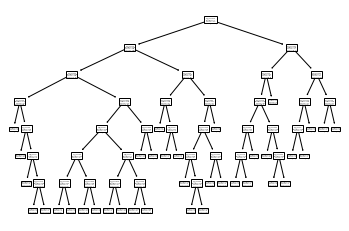

In [19]:
tree.plot_tree(clf_DT_entropy);

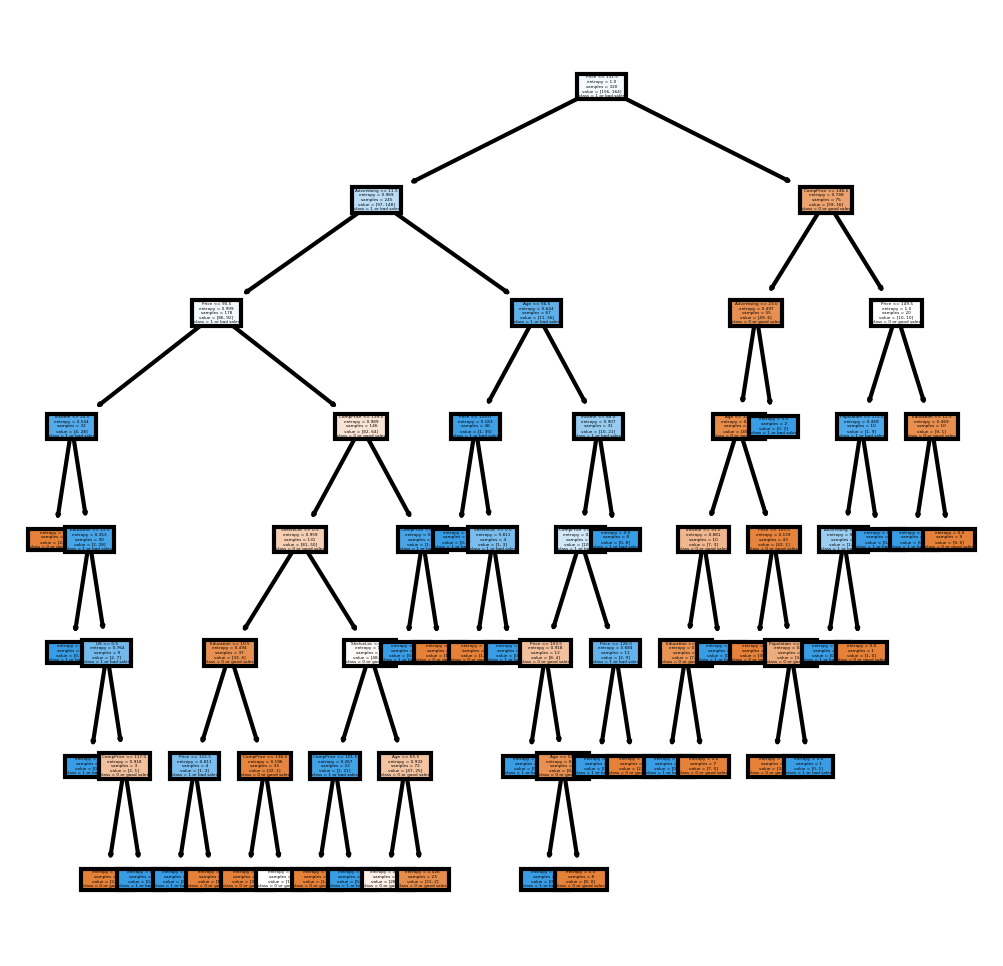

In [20]:
# visualizing desicion tree

fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Sales_Average']
cn=['0 or good sales','1 or bad sales' ]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf_DT_entropy,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [21]:
##Prediciton on test data 
y_pred = pd.DataFrame(clf_DT_entropy.predict(x_test))

In [22]:
y_pred

,0
0,0
1,0
2,1
3,0
4,0
...,...
75,0
76,0
77,0
78,0


In [23]:
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
roc_auc_score(y_test,y_pred) # accuracy score from test data

0.6523809523809524

### From ROC AUC score we can say that the test accuracy is also 0.65 which is not more than the original roc auc score.

In [24]:
confusion_matrix(y_test,y_pred) # confusion matrix to predict true positives and false positives

array([[33, 12],
       [15, 20]])

In [25]:
print(classification_report(y_test,y_pred)) # classification report

              precision    recall  f1-score   support

           0       0.69      0.73      0.71        45
           1       0.62      0.57      0.60        35

    accuracy                           0.66        80
   macro avg       0.66      0.65      0.65        80
weighted avg       0.66      0.66      0.66        80



### Conclusion

In [26]:
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus

In [29]:
colnames = list(comp.columns)
predictors = colnames[:10]
target = ['Less Sales','More Sales']

dot_data = StringIO()

export_graphviz(clf_DT_entropy,out_file = dot_data, filled =True, rounded = True, feature_names =predictors,class_names = target, impurity = False )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

##Creating the pdf file of decision tree
graph.write_pdf('company.pdf')

##Creating a png file of the decsion tree
graph.write_png('company.png')

True

In [ ]:
target